<a href="https://colab.research.google.com/github/meekrob/MunskyCollab/blob/main/Copy_of_Segmentation_C_elegans_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Downloading libraries - This cell will load some packages and then interrupt the runtime (i.e. it will seem to crash!).
%%capture
import os
!pip install tifffile
!pip install imagecodecs
import tifffile as tiff
os.kill(os.getpid(), 9)

In [ ]:
#@title Loading libraries
%%capture
# Loading libraries
import random                        # Library to generate random numbers
import skimage                       # Library for image manipulation
import numpy as np                   # Library for array manipulation
import matplotlib.pyplot as plt      # Library used for plotting
from skimage.io import imread        # Module from skimage to read images as numpy arrays
#from skimage.filters import gaussian # Module working with a gaussian filter
import pathlib                              # Library to work with file paths
import os
import os; from os import listdir; from os.path import isfile, join
import re
import glob
from skimage.measure import label, regionprops
from skimage import io, morphology, measure
from skimage.morphology import square, dilation
from skimage import measure
#from scipy.ndimage import gaussian_filter # not used

! pip install opencv-python-headless==4.7.0.72
! pip install cellpose==2.0
from cellpose import models
from cellpose import plot

%matplotlib inline

In [ ]:
#@title Function to import data from dropbox (double-click to show code)

def file_path_extraction(dropbox_link):
  '''
  This function is inteded to download and uncompress the data given in a dropbox_link
  '''
  start = dropbox_link.rindex( '/' )                          # Extraxting folder name after detecting the last "\".
  end = dropbox_link.index( '.zip?', start )                  # Extracting folder name after finding '.zip' on string.

  folder_name = dropbox_link[start+1:end]                     # Folder name
  compress_folder_name = folder_name +'.zip'                  # compressed folder name

  drive = pathlib.Path("/content")                            # Storage folder in colab
  found_files = list(drive.glob('**/'+compress_folder_name))  #

  print(found_files)

  if len(found_files) != 0:
    print(f"File already downloaded and can be found in {found_files[0]}.")
    command_unzip = f"unzip {compress_folder_name}"
    os.system(command_unzip)
  else:
    command_download = f"wget --no-check-certificate {dropbox_link} -r -A \'uc*\' -e robots=off -nd -O {compress_folder_name}"
    command_unzip = f"unzip {compress_folder_name}"
    os.system(command_download)
    os.system(command_unzip)
  # Deffine your directory paths
  current_dir = pathlib.Path().absolute()
  path_input = current_dir.joinpath(folder_name)
  # Reads the folder with the results and import the simulations as lists
  list_files_names = sorted([f for f in listdir(path_input) if isfile(join(path_input, f)) and ('.tif') in f], key=str.lower)  # reading all tif files in the folder
  list_files_names.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
  path_files = [ str(path_input.joinpath(f).resolve()) for f in list_files_names ] # creating the complete path for each file

  list_images = [imread(str(f)) for f in path_files]
  # Reading the microscopy data
  number_images = len(path_files)
  print('Number of images in file: ', number_images)
  return path_input, path_files,list_images

def NAS_download(NAS_link):
  # NAS_link like "http://129.82.125.224:34/IzabellaData/JM149_Rep1_L4440_RNAi_9.tgz"
  start = NAS_link.rindex('/')
  end = NAS_link.index( '.tgz', start)

  folder_name = NAS_link[start+1:end] # JM149_Rep1_L4440_RNAi_9
  tarball_name = NAS_link[start+1:] # JM149_Rep1_L4440_RNAi_9.tgz
  split_folder_name = folder_name.split('_')

  compressed_folder_name = "_".join([split_folder_name[0],'L1',split_folder_name[2], 'worm', split_folder_name[-1]])
  # JM149_L1_L4440_worm_9

  command_to_download = f"wget {NAS_link}"
  command_to_expand = f"tar -zxf {tarball_name}"

  drive = pathlib.Path("/content")                            # Storage folder in colab
  found_files = list(drive.glob('**/'+compressed_folder_name)) #

  print("Found", len(found_files), "files already downloaded")

  if len(found_files) == 0:
    print("Downloading")
    os.system(command_to_download)

  print("Expanding tgz...")
  os.system(command_to_expand)

  # Deffine your directory paths
  current_dir = pathlib.Path().absolute()
  path_input = current_dir.joinpath(compressed_folder_name)
  # Reads the folder with the results and import the simulations as lists
  list_files_names = sorted([f for f in listdir(path_input) if isfile(join(path_input, f)) and ('.tif') in f], key=str.lower)  # reading all tif files in the folder
  list_files_names.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
  path_files = [ str(path_input.joinpath(f).resolve()) for f in list_files_names ] # creating the complete path for each file

  list_images = [imread(str(f)) for f in path_files]
  # Reading the microscopy data
  number_images = len(path_files)
  print('Number of images in file: ', number_images)
  return path_input, path_files,list_images


In [ ]:
# Downloading data from a Dropbox links
#dropbox_link ='https://www.dropbox.com/s/rik27sljw86wdsm/OneDrive_1_7-18-2023.zip?dl=0'
#path_dir, path_files,list_images = file_path_extraction(dropbox_link)
#print('The images is stored in the following folder: ', path_dir)

# Downloading data from a NAS IP
NAS_link = 'http://129.82.125.224:34/IzabellaData/JM149_Rep6_L4440_RNAi_1.tgz'
#NAS_link = 'http://129.82.125.224:34/IzabellaData/JM259_Rep2_L4440_RNAi_4.tgz'
path_dir, path_files,list_images = NAS_download(NAS_link)
print('The images is stored in the following folder: ', path_dir)

Found 1 files already downloaded
Expanding tgz...
Number of images in file:  31
The images is stored in the following folder:  /content/JM149_L1_L4440_worm_1


In [ ]:
path_files

['/content/JM149_L1_L4440_worm_1/JM149_L1_L4440_worm_1_fullfocussectioning_GFP.tif',
 '/content/JM149_L1_L4440_worm_1/JM149_L1_L4440_worm_1_Z001_Overlay.tif',
 '/content/JM149_L1_L4440_worm_1/JM149_L1_L4440_worm_1_Z002_Overlay.tif',
 '/content/JM149_L1_L4440_worm_1/JM149_L1_L4440_worm_1_Z003_Overlay.tif',
 '/content/JM149_L1_L4440_worm_1/JM149_L1_L4440_worm_1_Z004_Overlay.tif',
 '/content/JM149_L1_L4440_worm_1/JM149_L1_L4440_worm_1_Z005_Overlay.tif',
 '/content/JM149_L1_L4440_worm_1/JM149_L1_L4440_worm_1_Z006_Overlay.tif',
 '/content/JM149_L1_L4440_worm_1/JM149_L1_L4440_worm_1_Z007_Overlay.tif',
 '/content/JM149_L1_L4440_worm_1/JM149_L1_L4440_worm_1_Z008_Overlay.tif',
 '/content/JM149_L1_L4440_worm_1/JM149_L1_L4440_worm_1_Z009_Overlay.tif',
 '/content/JM149_L1_L4440_worm_1/JM149_L1_L4440_worm_1_Z010_Overlay.tif',
 '/content/JM149_L1_L4440_worm_1/JM149_L1_L4440_worm_1_Z001_CH2.tif',
 '/content/JM149_L1_L4440_worm_1/JM149_L1_L4440_worm_1_Z001_CH4.tif',
 '/content/JM149_L1_L4440_worm_1/JM

# Reading all images and converting them into form ZYXC.

In [ ]:
# Separating images based on the color channel
selected_elements_Overlay = [element for element in path_files if 'Overlay.tif' in element]
selected_elements_CH2 = [element for element in path_files if 'CH2.tif' in element]
selected_elements_CH4 = [element for element in path_files if 'CH4.tif' in element]

In [ ]:
# Reading all images in each list.
list_images_CH2_full = [imread(str(f)) for f in selected_elements_CH2]  # [Y,X,3C]  Color channels 0 and 2 are empty. Use channel 1
list_images_CH2 = [img[:,:,1] for img in list_images_CH2_full] #
list_images_CH4 = [imread(str(f)) for f in selected_elements_CH4]  # [Y,X]   It appears to be to contain the same information as Overlay
list_images_Overlay = [imread(str(f)) for f in selected_elements_Overlay] # [Y,X,3C]  # It has 3 color channels but all appear to contain the same information

In [ ]:
# Creating 3D arrays with all images in the list
images_CH2_3d = np.stack(list_images_CH2)
images_C4_3d = np.stack(list_images_CH4)

In [ ]:
# Creating a 4D array with shape ZYXC.  GFP
array4d = np.concatenate((images_CH2_3d[np.newaxis, ...], images_C4_3d[np.newaxis, ...]), axis=0)
# Move the axis from position 0 to position 2
image_ZYXC = np.moveaxis(array4d, 0, 3)
print('Final image shape: ', image_ZYXC.shape, '\nGFP is channel 0 \nBrightfield is channel 1')

Final image shape:  (10, 1440, 1920, 2) 
GFP is channel 0 
Brightfield is channel 1


In [ ]:
# Plotting maximum projection
max_GFP = np.max(image_ZYXC[:,:,:,0],axis=0)
max_Brightfield = np.max(image_ZYXC[:,:,:,1],axis=0)

print('Range in GFP: min', np.min(max_GFP), 'max',np.max(max_GFP))
print('Range in Brightfield: min', np.min(max_Brightfield), 'max',np.max(max_Brightfield))

Range in GFP: min 0 max 25
Range in Brightfield: min 50 max 255


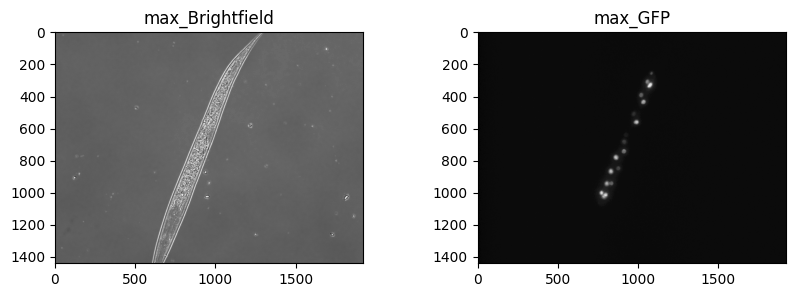

In [ ]:
#@title Plotting max projections
color_map = 'Greys_r'
fig, ax = plt.subplots(1,2, figsize=(10, 3))
# Plotting the heatmap of a section in the image
ax[0].imshow(max_Brightfield,cmap=color_map)
ax[1].imshow(max_GFP,cmap=color_map)
ax[0].set(title='max_Brightfield'); ax[0].axis('on');ax[0].grid(False)
ax[1].set(title='max_GFP'); ax[1].axis('on');ax[1].grid(False)
plt.show()

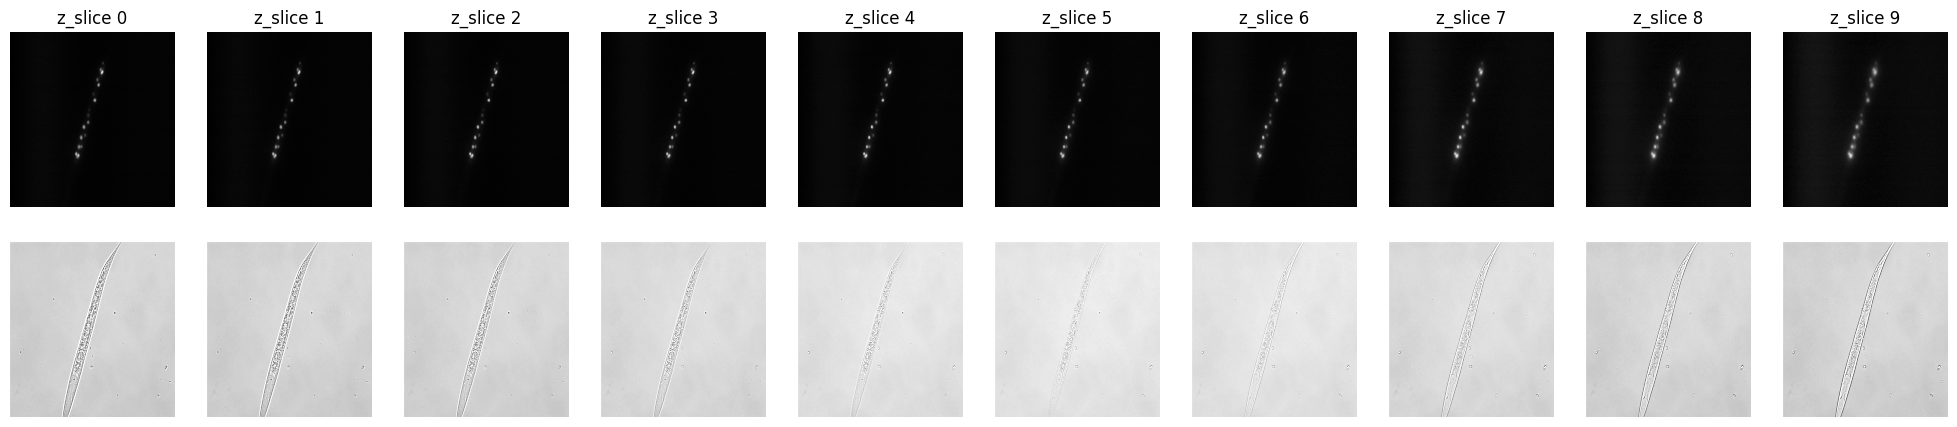

In [ ]:
#@title Plotting all z-slices
number_z_slices = image_ZYXC.shape[0]
fig, ax = plt.subplots(2,number_z_slices, figsize=(25, 5))
color_map = 'Greys_r'
# Plotting the heatmap of a section in the image
for i in range (number_z_slices):
    # Channel 0
    temp_image_0= image_ZYXC[i,:,:,0]
    max_visualization_value = np.percentile(temp_image_0,100)
    ax[0,i].imshow(temp_image_0,vmax=max_visualization_value,cmap=color_map)
    ax[0,i].set(title='z_slice '+ str(i)); ax[0,i].axis('off');ax[0,i].grid(False); ax[0,i].axis('tight')
    # Channel 1
    temp_image_1= image_ZYXC[i,:,:,1]
    max_visualization_value = np.percentile(temp_image_1,99)
    ax[1,i].imshow(temp_image_1,vmax=max_visualization_value,cmap=color_map)
    ax[1,i].axis('off');ax[1,i].grid(False); ax[1,i].axis('tight')
plt.show()


In [ ]:
#@title Using cellpose to segment image
color_map = 'Greys_r'

model = models.Cellpose(gpu=True, model_type='cyto2') # model_type='cyto', 'cyto2' or model_type='nuclei'
list_ranges =np.linspace(20, 300, 10, dtype='int')  #[50,100,150,200,250]
list_masks = []
masks_total = np.zeros_like(max_Brightfield)
for _,diameter in enumerate (list_ranges):
  masks = model.eval(max_Brightfield, diameter=diameter, flow_threshold=1, channels=[0,0], net_avg=True, augment=True)[0]
  masks_total = masks_total+ masks
# Binarization
new_mask = masks_total.copy()
new_mask[new_mask>0]=1
# Define a threshold for the size of regions to keep
min_region_size = 500
new_mask = morphology.remove_small_objects(new_mask > 0, min_size=min_region_size, connectivity=2)
dilated_mask = dilation(new_mask, square(30))

# Removing elements that are not part of the main mask
radius_threshold = 250
# Label connected regions in the mask
labeled_mask = label(dilated_mask)
# Get region properties of each labeled region
props = regionprops(labeled_mask)
# Create a new mask to store regions with radius greater than the threshold
final_mask = np.zeros_like(dilated_mask, dtype=np.uint8)
# Iterate over the region properties
for prop in props:
    # Get the radius of the region
    radius = prop.equivalent_diameter / 2
    # Check if the radius is greater than the threshold
    if radius > radius_threshold:
        # Get the coordinates of the region
        coords = prop.coords
        # Set the region in the new mask
        final_mask[coords[:, 0], coords[:, 1]] = 1

In [ ]:
# Mask by image
segmented_image = np.multiply(final_mask,max_Brightfield)
# Plotting
fig, ax = plt.subplots(1,3, figsize=(15, 5))
# Plotting the heatmap of a section in the image
ax[0].imshow(max_Brightfield,cmap=color_map)
ax[1].imshow(final_mask,cmap=color_map)
ax[2].imshow(segmented_image,cmap=color_map)
ax[0].set(title='brightfield'); ax[0].axis('on');ax[0].grid(False)
ax[1].set(title='Mask'); ax[1].axis('on');ax[1].grid(False)
ax[2].set(title='brightfield * mask'); ax[2].axis('on');ax[0].grid(False)
plt.show()

In [ ]:
from skimage import transform
from scipy.ndimage import center_of_mass
plot_center = np.array(segmented_image.T.shape)[:2]/2
print(segmented_image.shape)
print(-plot_center)
shift_to_plot_center = transform.EuclideanTransform(translation=-plot_center)
cm = center_of_mass(segmented_image.T)
print(cm)
pc = np.array(segmented_image.T.shape)[:2]/2
print(pc)


In [ ]:
minmax = lambda x: (min(x), max(x))
x,y = segmented_image.T.nonzero()
print("min/max y:", minmax(y))
print("min/max x:", minmax(x))
# horizontal line through worm
A = np.vstack([x, np.ones(len(x))]).T
horiz_fit = np.linalg.lstsq(A, y, rcond=None)
horiz_slope, horiz_intercept = horiz_fit[0]
print(f"Horizontal: {horiz_slope=}, intercept {round(horiz_intercept)}, SS Resid {horiz_fit[1]}")

# vertical line through worm
#x, y = segmented_image.T.nonzero()
A = np.vstack([y, np.ones(len(y))]).T
vertical_fit = np.linalg.lstsq(A, x, rcond=None)
vertical_slope, vertical_intercept = vertical_fit[0]
print(f"Vertical: {vertical_slope=}, intercept {round(vertical_intercept)}, SS Resid {vertical_fit[1]}")

horiz_line = lambda a: a*horiz_slope + horiz_intercept
vertical_line = lambda a: a*vertical_slope + vertical_intercept

horiz_line_inv = lambda a: (a-horiz_intercept)/horiz_slope
vertical_line_inv = lambda a: (a-vertical_intercept)/vertical_slope

In [ ]:
m,b = vertical_fit[0]
m,b

In [ ]:
def in_range(x, low, high):
  if x >= low and x <= high: return x
  return None

def line_in_box(line, x0, y0, w, h):
  # return (x,y) the coordinates of the line intersecting
  # the box in the order: bottom, left, top, right
  # If the line does not intersect the given boundary,
  # the tuple is None.
  # An intersecting line has two intersected boundaries,
  # none if it doesn't (returns None, None, None, None)
  m, b = line

  # x or y coordinate will be None if out of range
  # otherwise it's the point of intersection for the
  # given boundary
  bottom = (in_range(-b/m, 0, w), 0)
  right = (w, in_range(m*w + b, 0, h))
  left = (0, in_range(b, 0, h))
  top = (in_range((h-b)/m, 0, w), h)

  # for any out-of-range coordinates, use None for the whole tuple
  if bottom[0] is None: bottom = None
  if right[1] is None: right = None
  if left[1] is None: left = None
  if top[0] is None: top = None

  return bottom, left, top, right

def isect_line_box(line, x0, y0, w, h):
  bltr = line_in_box(line, x0, y0, w, h)
  x = [ coord[0] for coord in bltr if coord is not None]
  y = [ coord[1] for coord in bltr if coord is not None]
  # returns empty lists if the line doesn't intersect
  return x, y

In [ ]:
from mpl_toolkits.mplot3d.axes3d import martist
img_height, img_width = segmented_image.shape

xmin = 0
xmax = img_width
ymin = 0
ymax = img_height

# horiz
horiz_xbounds, horiz_ybounds = isect_line_box(horiz_fit[0], 0, 0, img_width, img_height)
horiz_xseries = np.linspace(horiz_xbounds[0], horiz_xbounds[1],3)
horiz_yseries = np.linspace(horiz_ybounds[0], horiz_ybounds[1],3)
print("horizontal line coordinates")
print(f"{horiz_xseries=}")
print(f"{horiz_yseries=}")

# vert
vertical_ybounds, vertical_xbounds = isect_line_box(vertical_fit[0], 0, 0, img_height, img_width)
vertical_xseries = np.linspace(vertical_xbounds[0], vertical_xbounds[1],3)
vertical_yseries = np.linspace(vertical_ybounds[0], vertical_ybounds[1],3)
print("vertical line coordinates")
print(f"{vertical_xseries=}")
print(f"{vertical_yseries=}")

# center of fitted line (horizontal)
cm_horiz = (horiz_xseries[1],horiz_yseries[1])
cm_horiz_shift = transform.EuclideanTransform(translation=-np.array(cm_horiz))
# center of fitted line (vertical)
cm_vertical = (vertical_xseries[1],vertical_yseries[1])
cm_vertical_shift = transform.EuclideanTransform(translation=-np.array(cm_vertical))

# plot 4 panels, top row horiz, vertical line fits
fig, ax  = plt.subplots(3,2, figsize=(15,10))
fig.suptitle("rotation")
ax[0,0].imshow(segmented_image,cmap=color_map)
ax[0,0].scatter(cm_horiz[0], cm_horiz[1],  s=10, edgecolors='b')
ax[0,0].scatter(pc[0], pc[1],  s=10, edgecolors='y', c='yellow')
ax[0,0].plot(horiz_xseries, horiz_yseries,'r')
ax[0,0].set(title='horizontal line fit')

# vertical
ax[0,1].imshow(segmented_image,cmap=color_map)
ax[0,1].scatter(cm_vertical[0], cm_vertical[1], s=10, edgecolors='b')
ax[0,1].scatter(pc[0], pc[1],  s=10, edgecolors='y', c='yellow')
ax[0,1].plot(vertical_xseries, vertical_yseries,'r')
ax[0,1].set(title='vertical line fit')


#### rotate and translate plots
import math

# horiz
angleH = -math.atan(horiz_slope)
print("horiz angle", math.degrees(angleH))
rotation = transform.EuclideanTransform(rotation=angleH)
shift_to_plot_center_h = transform.EuclideanTransform(translation= (plot_center[1]-cm_horiz[1], plot_center[0]-cm_horiz[0]))

matrix_h = np.linalg.inv(cm_horiz_shift.params) @ rotation.params @ cm_horiz_shift.params @ shift_to_plot_center_h
tform_h = transform.EuclideanTransform(matrix_h)
print("tform horiz", tform_h)
tf_img = transform.warp(segmented_image, tform_h.inverse)

# vertical
angleV = math.atan(vertical_slope)+math.pi/2
print("vertical angle", math.degrees(angleV))
rotation = transform.EuclideanTransform(rotation=angleV)
matrix_v = np.linalg.inv(cm_vertical_shift.params) @ rotation.params @ shift_to_plot_center.params # cm_vertical_shift.params #
tform_v = transform.EuclideanTransform(matrix_v)
print("tform vertical", tform_v)
tf_img = transform.warp(segmented_image, tform_v.inverse)

ax[1,0].imshow(tf_img, cmap=color_map)
ax[1,0].scatter(pc[0], pc[1],  s=10, edgecolors='yellow', c='yellow')
ax[1,0].set(title='rotate %d degrees' % math.degrees(angleH))
ax[1,1].imshow(tf_img, cmap=color_map)
ax[1,1].scatter(pc[0], pc[1],  s=10, edgecolors='yellow', c='yellow')
ax[1,1].set(title='rotate %d degrees' % math.degrees(angleV))
# plt.show()

# choose the transform coming from the better fit
if horiz_fit[1] < vertical_fit[1]:
  print("using horiz fit")
  matrix = matrix_h
  tform = tform_h
else:
  print("using vertical fit")
  matrix = matrix_v
  tform = tform_v

# readjust to center for some reason
rotated_image = transform.warp(segmented_image, tform.inverse)
cm_y, cm_x = center_of_mass(rotated_image)
shift_to_origin = transform.EuclideanTransform(translation= [-cm_y, -cm_x])
shift_to_img_center = transform.EuclideanTransform(translation= [pc[1], pc[0]])
#print(transform.EuclideanTransform(translation= [-cm_y, -cm_x]).params )
print(shift_to_origin.params)
print(shift_to_img_center.params)
recentered_matrix = shift_to_origin.params @ shift_to_img_center.params
recentered_tform = transform.EuclideanTransform( recentered_matrix )
recentered = transform.warp(rotated_image, recentered_tform.inverse)

ax[2,0].imshow(recentered, cmap=color_map)
ax[2,0].scatter(pc[0], pc[1],  s=10, edgecolors='yellow', c='yellow')
ax[2,0].set(title='recentered transform on rotated')

final_matrix = recentered_matrix @ matrix
final_tform = transform.EuclideanTransform( final_matrix )

trycombinedtransform = transform.warp(segmented_image, final_tform.inverse)
ax[2,1].imshow(trycombinedtransform, cmap=color_map)
ax[2,1].scatter(pc[0], pc[1],  s=10, edgecolors='yellow', c='yellow')
ax[2,1].set(title='full transform start to finish')
plt.show()

# Nuclei segmentation using trackpy

In [ ]:
%%capture
! pip install trackpy
import trackpy as tp # Library for particle tracking

In [ ]:
GFP = max_GFP.copy()

In [ ]:
# This section generates an histograme with the intensity of the detected particles in the image.
particle_size = 21 # according to the documentation must be an odd number 3,5,7,9 etc.
spots_detected_dataframe_all = tp.locate(GFP, diameter=particle_size, minmass=0)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(4, 4))
ax.hist(spots_detected_dataframe_all['mass'], bins=50, color = "orangered", ec="orangered")
ax.set(xlabel='mass', ylabel='count')
plt.show()

## Selecting spots located inside the mask

In [ ]:
def spots_in_mask(df,masks):
    # extracting the contours in the image
    coords = np.array([df.y, df.x]).T # These are the points detected by trackpy
    coords_int = np.round(coords).astype(int)  # or np.floor, depends
    values_at_coords = masks[tuple(coords_int.T)] # If 1 the value is in the mask
    df['In Mask']=values_at_coords # Check if pts are on/in polygon mask
    condition = df['In Mask'] ==1
    selected_rows = df[condition]
    return selected_rows

# Optimization process to detect the maximum number of spots

In [ ]:
# Creating vectors to test all conditions for nuclei detection.
number_optimization_steps = 10
particle_size_vector = [num for num in range(13, 25 + 1) if num % 2 != 0][:number_optimization_steps]
print('particle_size_vector: ', particle_size_vector)
minmass_vector = np.linspace(250, 500, num=number_optimization_steps, endpoint=True,dtype=int)
print('minmass_vector: ', minmass_vector)

In [ ]:
# main loop that ierates for all parameters
metric = np.zeros((number_optimization_steps,number_optimization_steps))
for i,minmass in enumerate(minmass_vector):
  for j, particle_size in enumerate(particle_size_vector):
    spots_detected_dataframe = tp.locate(GFP,diameter=particle_size, minmass=minmass)
    # Selecting only spots located inside mask
    df_in_mask = spots_in_mask(df=spots_detected_dataframe,masks=final_mask)
    if len(df_in_mask) > 0:
      metric[i,j] = np.sum(df_in_mask['mass']) / len(df_in_mask) # maximizes the mean intensity in all spots
    else:
      metric[i,j] = 0
    del spots_detected_dataframe, df_in_mask
metric = metric.astype(int)


In [ ]:
print(metric)

In [ ]:
# selecting indces that maximize metric
selected_minmass_index, selected_particle_size_index = np.unravel_index(metric.argmax(), metric.shape)
selected_minmass = minmass_vector[selected_minmass_index]
selected_particle_size = particle_size_vector[selected_particle_size_index]
print(selected_minmass)
print(selected_particle_size)

In [ ]:
# running the code with the selected parameters
spots_detected_dataframe = tp.locate(GFP,diameter=selected_particle_size, minmass=selected_minmass) # "spots_detected_dataframe" is a pandas data freame that contains the infomation about the detected spots
df_in_mask = spots_in_mask(df=spots_detected_dataframe,masks=final_mask)


In [ ]:
# rotating the image with the transform matrix based on the vertical fit
df_mx = df_in_mask.loc[:,('x','y')]
df_mx['1'] = 1
df_mx_t = df_mx.to_numpy().T
print(df_mx)
print(final_matrix)
rotated = (final_matrix @ df_mx.T).T
df_in_mask_rotated = df_in_mask.copy()
df_in_mask_rotated['x'] = rotated.iloc[:,0]
df_in_mask_rotated['y'] = rotated.iloc[:,1]
print(df_in_mask_rotated)


In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
tp.annotate(df_in_mask_rotated, transform.warp(GFP, final_tform.inverse),plot_style={'markersize': 1.5}, ax = ax[0])  # tp.anotate is a trackpy function that displays the image with the detected spots
tp.annotate(df_in_mask_rotated, transform.warp(segmented_image, final_tform.inverse),plot_style={'markersize': 1.5}, ax = ax[1])
plt.show()

In [ ]:
len(df_in_mask_rotated)

# Calculating total intensities. Sum of intensity in all pixels inside of a cell mask.

In [ ]:
# Total intensity values
fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.hist(df_in_mask['mass'], bins=15, color = "orangered", ec="orangered")
ax.set(xlabel='total intensity', ylabel='count')
plt.show()

In [ ]:
# Nuclei size
fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.hist(df_in_mask['size'], bins=15, color = "orangered", ec="orangered")
ax.set(xlabel='nuclei size', ylabel='count')
plt.show()